<a href="https://colab.research.google.com/github/Maxhzrz/Tarea_diplomado/blob/main/Evaluacion_1_mineria_de_datos_uc_r%26m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
## Carga de archivos
paises <- read.csv(file= "https://raw.githubusercontent.com/Maxhzrz/Tarea_diplomado/main/DatosPaises.csv",sep=";")
library(dplyr)
head(paises)




,PAIS,PIB,POB,IDH,GINI,IPC,FAO,GENERO,ELECTRICIDAD,ESCOLARIDAD,⋯,TURISMO,INTERNET,VIOLENCIA,VIDA,CELULAR,DESERCION,PRISION,RENOVABLE,PARLAMENTO,INMIGRANTES
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Qatar,127.54265,2.169,0.8498,29.95,107.07,1.75,0.524,98,13.79,⋯,2.611,91.49,38.3,78.2,145.76,2.26,60,0.00,0.00,73.82
2,Luxembourg,87.77164,0.543,0.8919,29.00,108.01,1.27,0.100,100,13.88,⋯,0.945,94.67,39.5,81.7,148.37,5.60,122,3.98,28.33,43.25
3,Kuwait,82.36923,3.250,0.8163,29.00,111.19,2.60,0.387,98,14.75,⋯,0.300,78.70,39.5,74.4,218.43,5.93,137,0.00,1.54,60.21
4,Singapore,76.24004,5.399,0.9118,29.95,112.65,1.02,0.088,100,15.40,⋯,11.900,82.00,9.2,83.0,158.13,1.32,230,2.79,25.25,42.93
5,Brunei,69.44976,0.418,0.8556,29.00,102.88,2.95,0.064,76,14.53,⋯,0.225,68.77,39.5,78.8,110.06,3.63,122,0.00,23.17,49.35
6,Norway,62.45083,5.084,0.9439,26.83,104.19,1.51,0.067,100,17.49,⋯,4.963,96.30,26.8,81.6,116.51,1.51,72,47.75,39.64,13.77


In [67]:
# Se elige PIB, IDH, ESCOLARIDAD, Coef de GINI (Indice de desigualdad)
summary(paises[c("PIB", "IDH","GINI","ESCOLARIDAD")])

      PIB                IDH              GINI        ESCOLARIDAD   
 Min.   :  0.5849   Min.   :0.3483   Min.   :24.82   Min.   : 4.10  
 1st Qu.:  3.3432   1st Qu.:0.5738   1st Qu.:31.01   1st Qu.:11.09  
 Median : 10.9972   Median :0.7241   Median :36.75   Median :13.07  
 Mean   : 17.1589   Mean   :0.6924   Mean   :38.29   Mean   :12.88  
 3rd Qu.: 23.1280   3rd Qu.:0.8166   3rd Qu.:43.22   3rd Qu.:15.03  
 Max.   :127.5426   Max.   :0.9439   Max.   :65.77   Max.   :20.22  

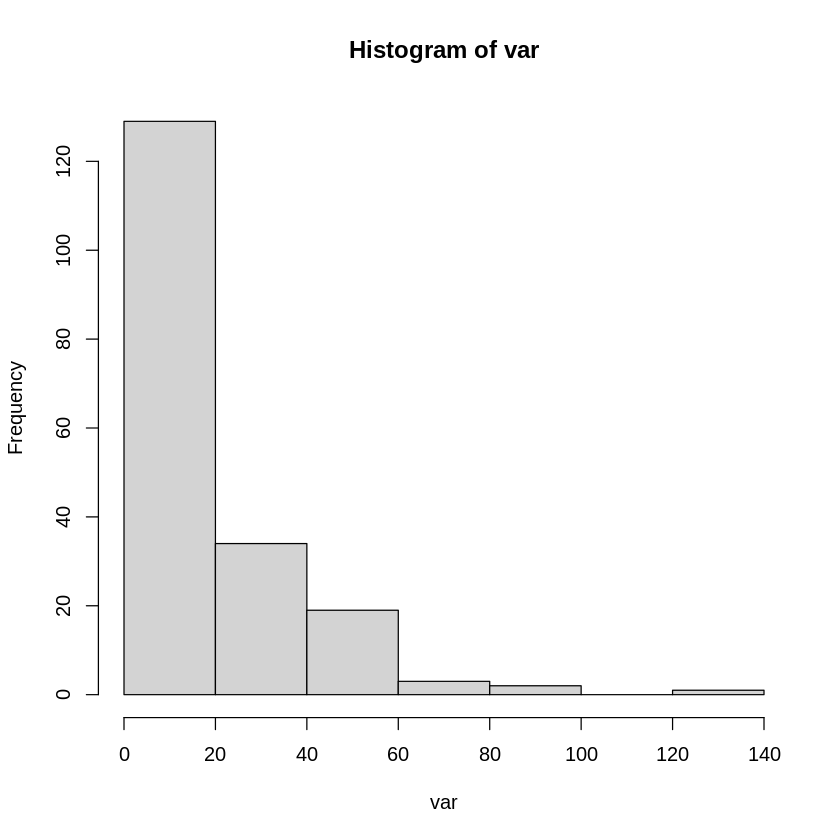

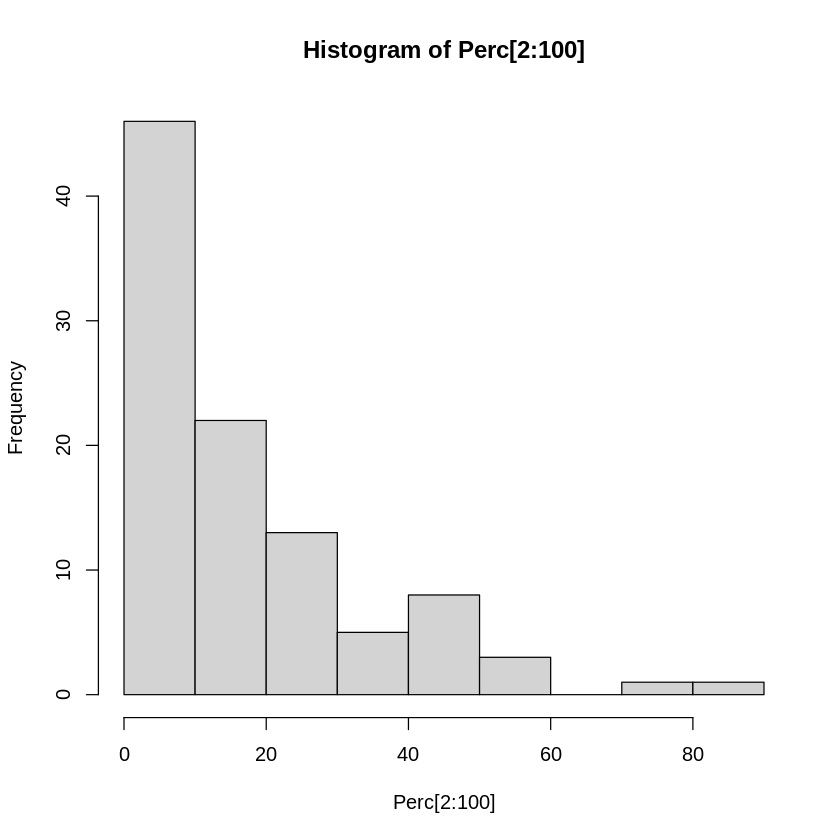

[1] 0.5265957
[1] 0.9787234


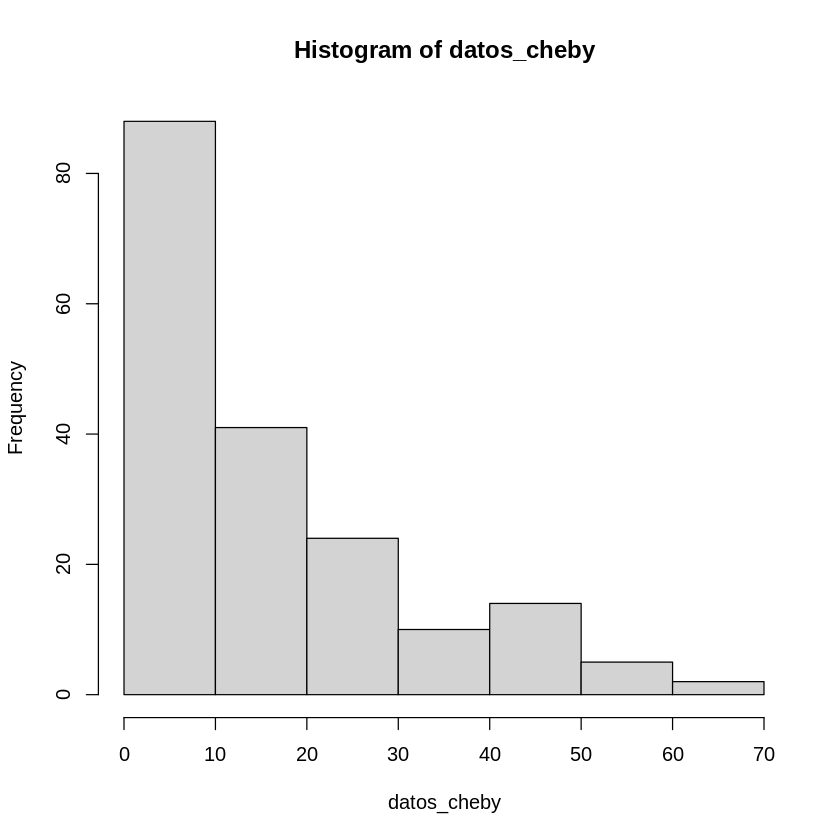

[1] 0.9787234
[1] 0.5265957
[1] 0.9787234


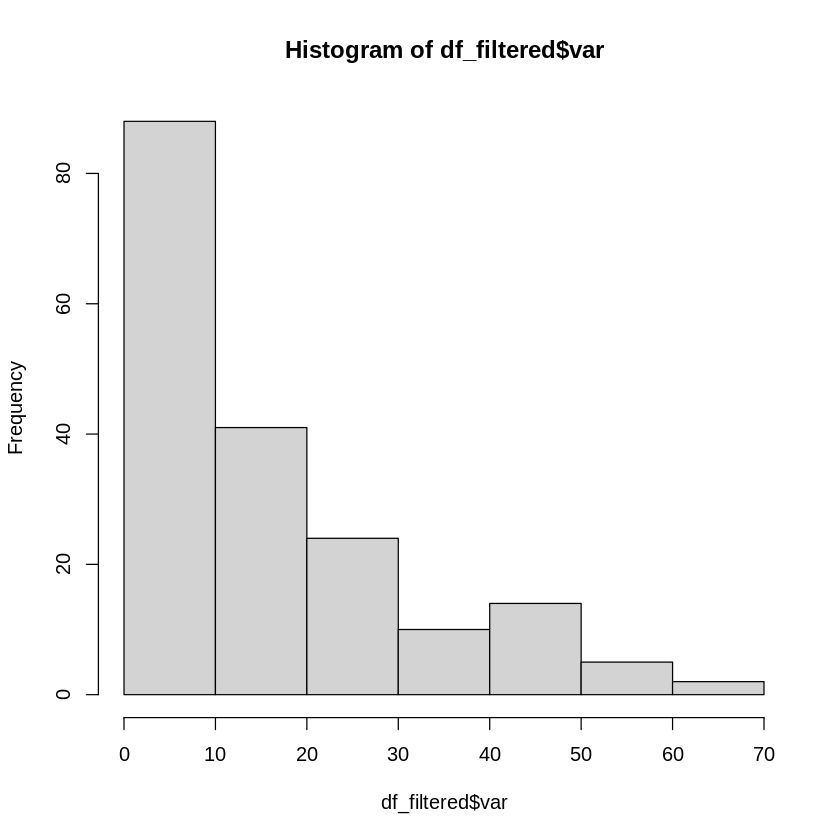

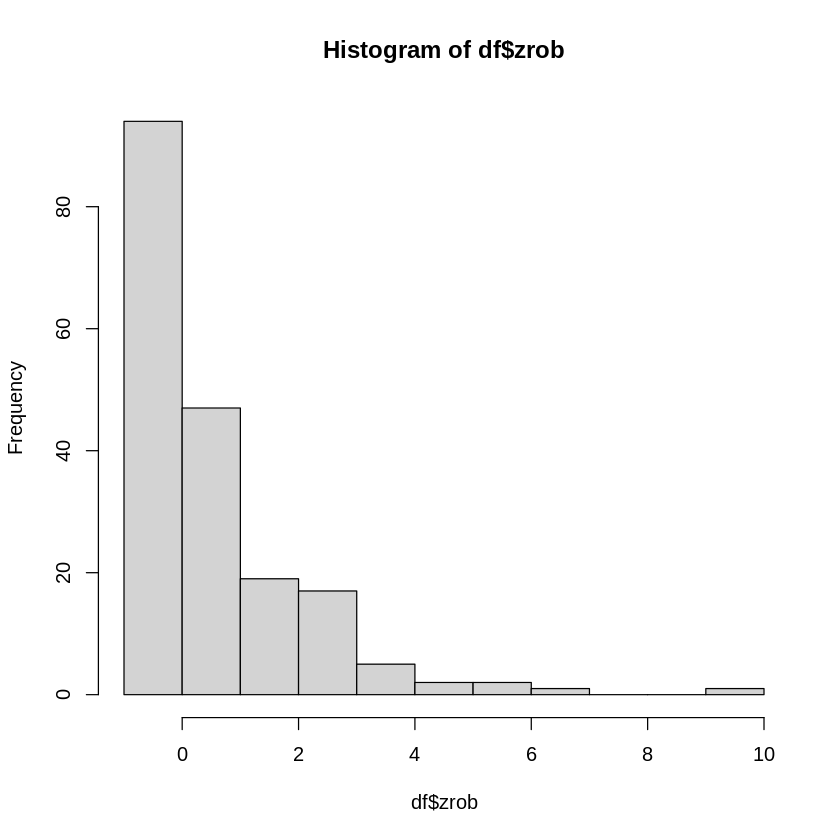

In [68]:
# PIB

var<-paises$PIB
hist(var)
# Método 1 - Percentiles
Perc<- quantile(var, prob=seq(0, 1, length = 101))
#P_PIB[100]
#P_PIB[2]
hist(Perc[2:100])
prop_perc<-length(Perc[2:100])/length(var)
#Método 2 - Desigualdad de Chevyshev
  # Define el valor de k
  k <- 3
  # Calcula la media y la desviación estándar
  mean <- mean(var)
  sd <- sd(var)

  # Calcula el número de datos dentro de k desviaciones estándar de la media
  in_range <- sum(abs(var - mean) <= k * sd)

  # Chebyshev's inequality theoretical lower bound
  chebyshev_bound <- 1 - 1 / k^2

datos_cheby<- var[(abs(var - mean) <= k * sd)]
prop_cheby<-length(datos_cheby)/length(var)
hist(datos_cheby)
print(prop_perc)
print(prop_cheby)
#Método 3 - Z Robusto
#define funcion
robust_z <- function(x) {
  median_x <- median(x)
  mad_x <- mad(x)
  z <- (x - median_x) / mad_x
  return(z)
}
# se aplica al dataframe
df<- as.data.frame(data.frame(var))
df$zrob<-  robust_z(var)
df_filtered <- df[abs(df$zrob) <= 5,]
hist(df_filtered$var)
prop_zrob<-length(df_filtered$var)/length(var)
print(prop_zrob)
print(prop_perc)
print(prop_cheby)


hist(df$zrob)

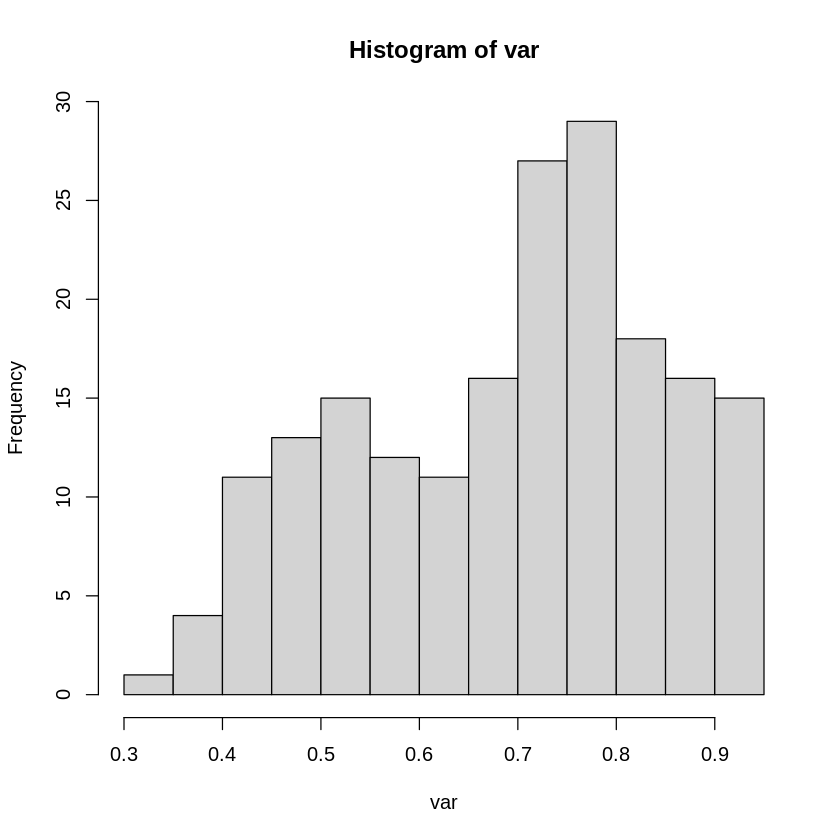

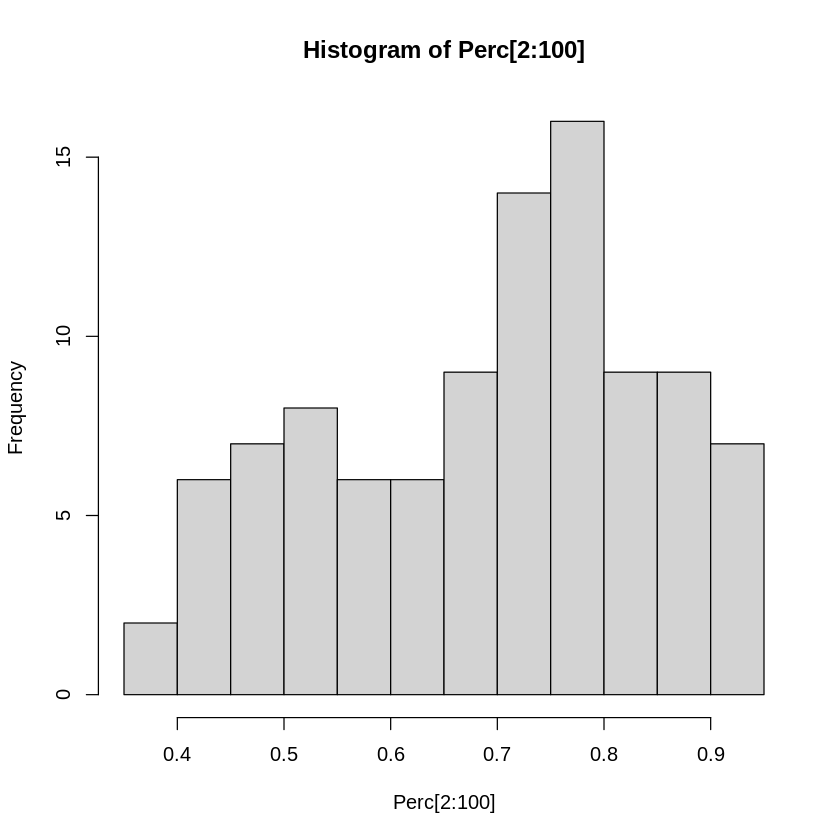

[1] 0.5265957
[1] 1


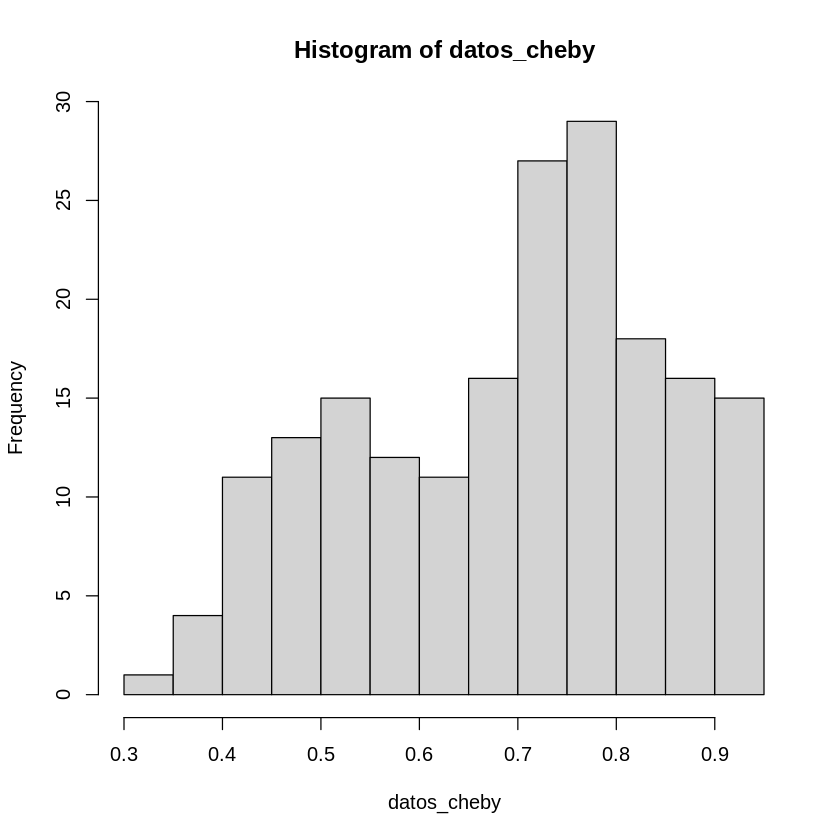

[1] 1
[1] 0.5265957
[1] 1


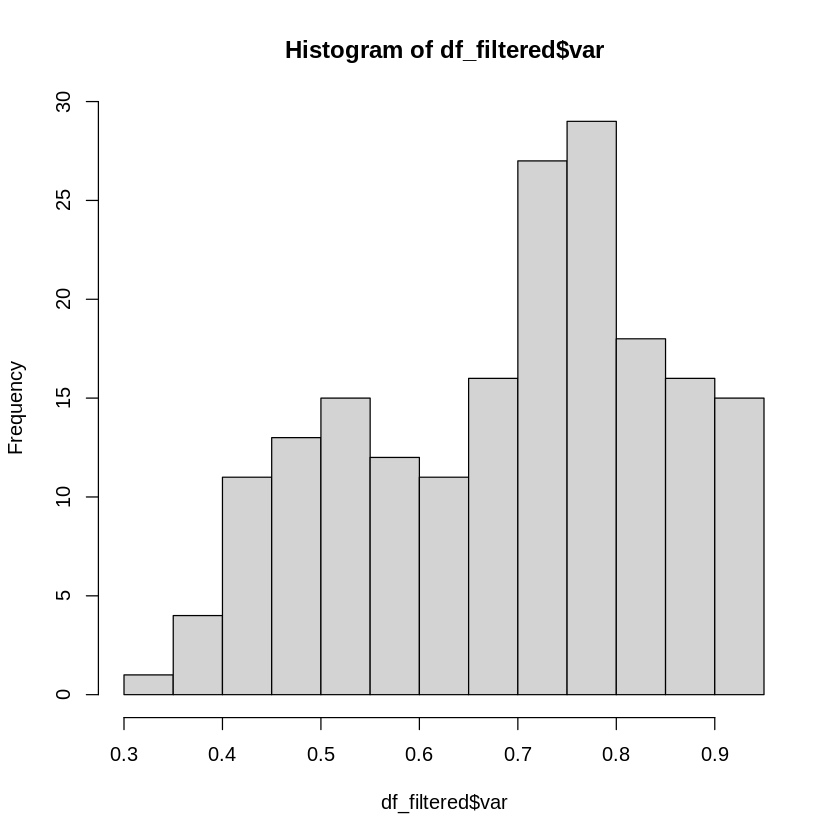

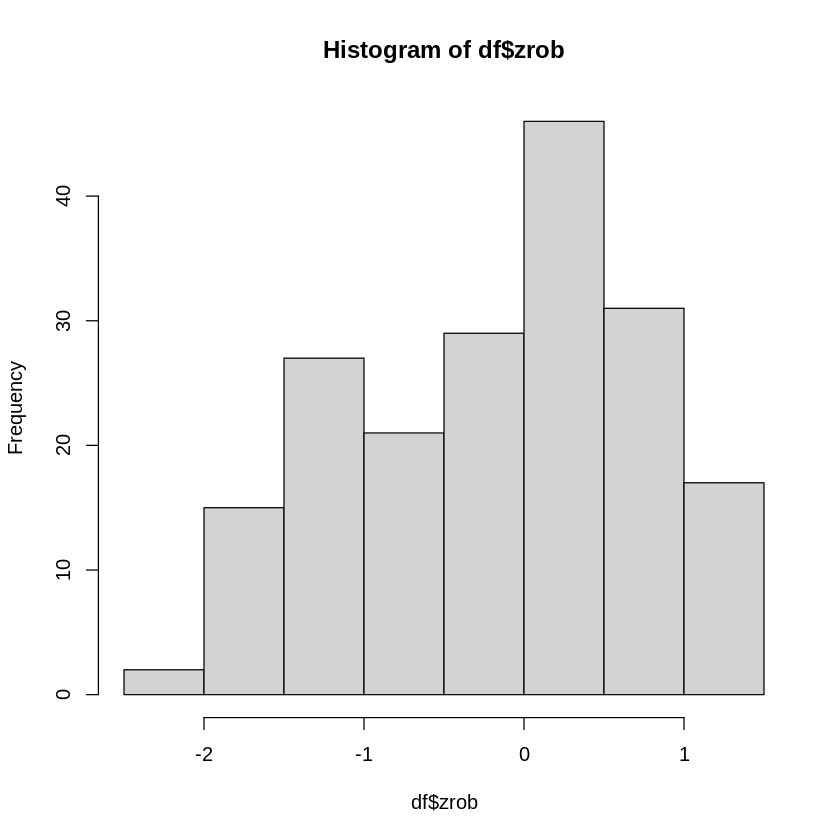

In [69]:
var<-paises$IDH
hist(var)
# Método 1 - Percentiles
Perc<- quantile(var, prob=seq(0, 1, length = 101))
#P_PIB[100]
#P_PIB[2]
hist(Perc[2:100])
prop_perc<-length(Perc[2:100])/length(var)
#Método 2 - Desigualdad de Chevyshev
  # Define el valor de k
  k <- 3
  # Calcula la media y la desviación estándar
  mean <- mean(var)
  sd <- sd(var)

  # Calcula el número de datos dentro de k desviaciones estándar de la media
  in_range <- sum(abs(var - mean) <= k * sd)

  # Chebyshev's inequality theoretical lower bound
  chebyshev_bound <- 1 - 1 / k^2

datos_cheby<- var[(abs(var - mean) <= k * sd)]
prop_cheby<-length(datos_cheby)/length(var)
hist(datos_cheby)
print(prop_perc)
print(prop_cheby)
#Método 3 - Z Robusto
#define funcion
robust_z <- function(x) {
  median_x <- median(x)
  mad_x <- mad(x)
  z <- (x - median_x) / mad_x
  return(z)
}
# se aplica al dataframe
df<- as.data.frame(data.frame(var))
df$zrob<-  robust_z(var)
df_filtered <- df[abs(df$zrob) <= 5,]
hist(df_filtered$var)
prop_zrob<-length(df_filtered$var)/length(var)
print(prop_zrob)
print(prop_perc)
print(prop_cheby)


hist(df$zrob)

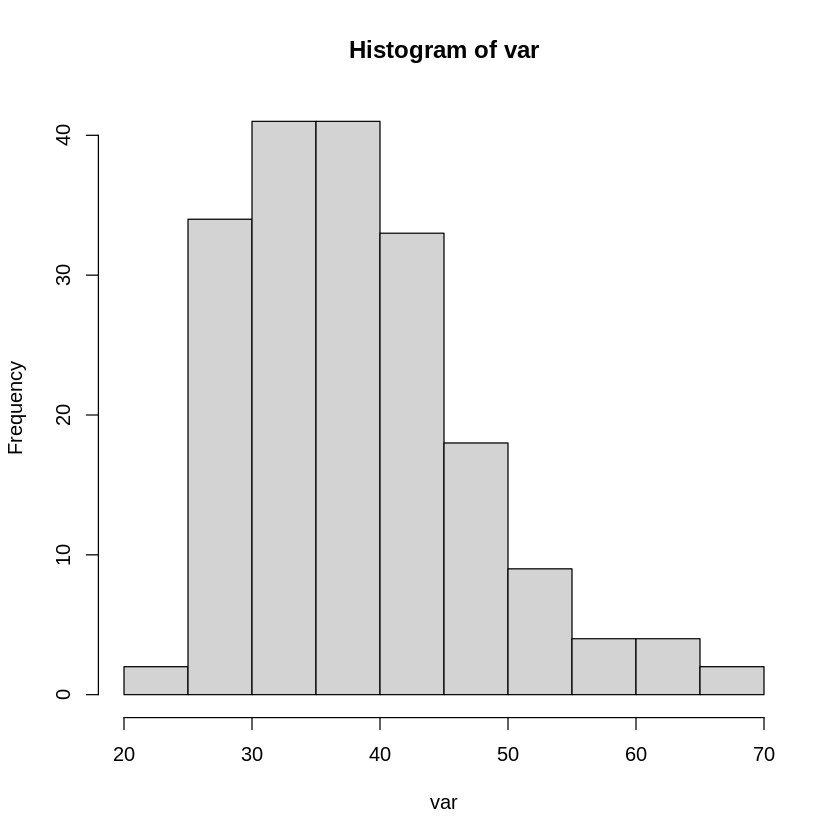

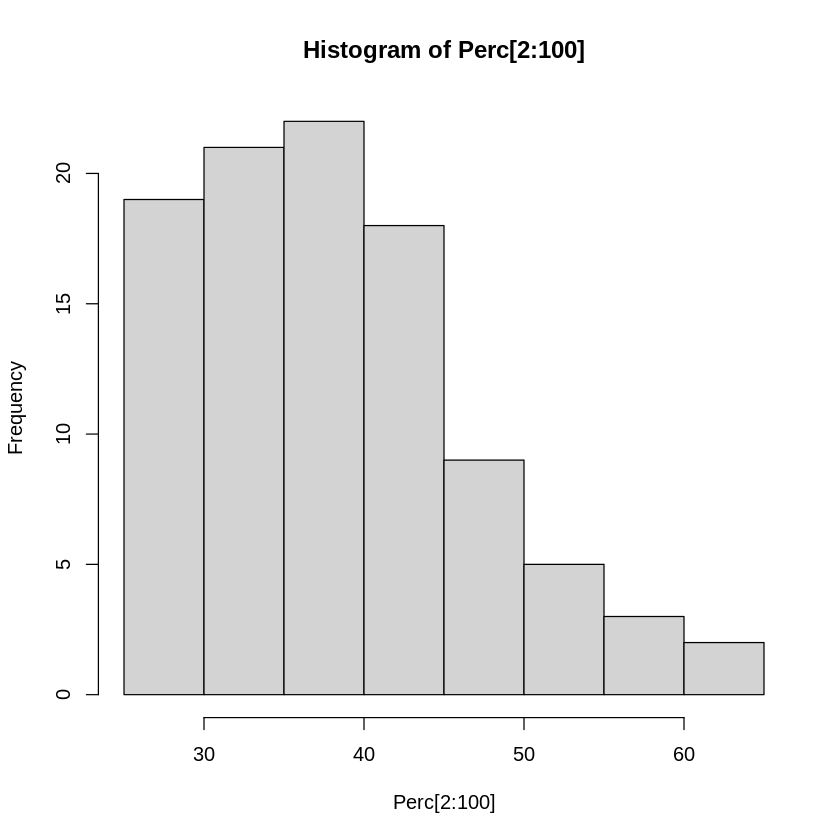

[1] 0.5265957
[1] 0.9893617


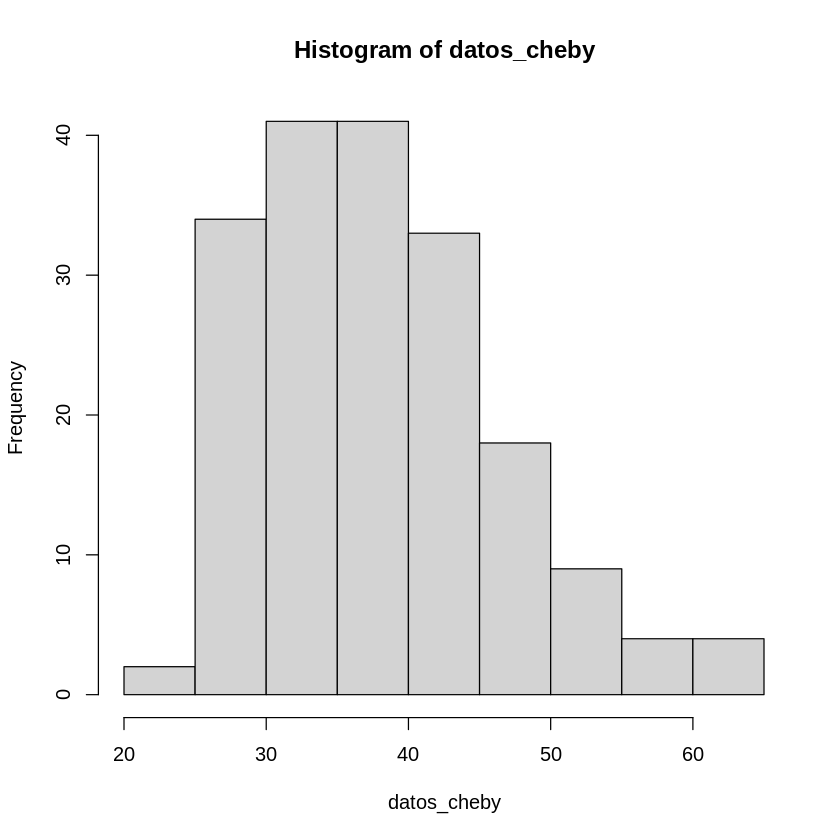

[1] 1
[1] 0.5265957
[1] 0.9893617


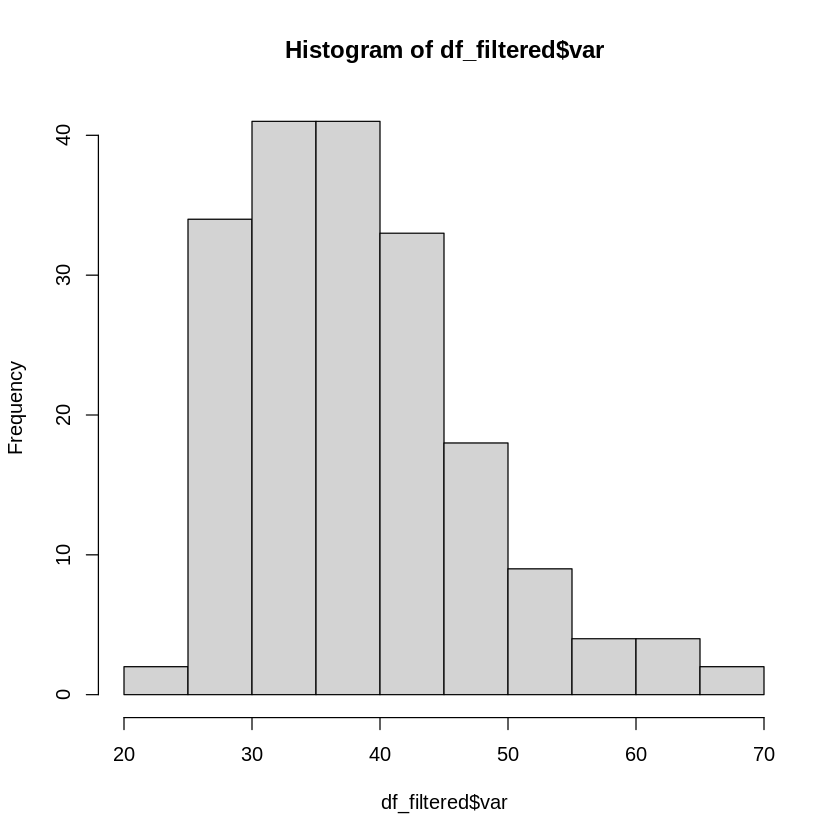

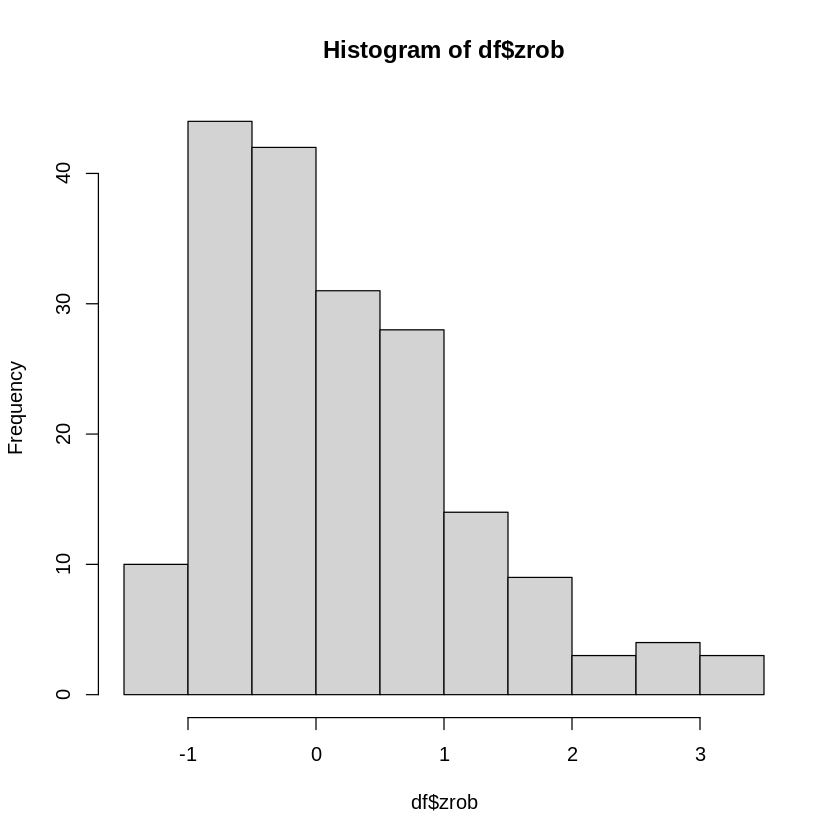

In [70]:
var<-paises$GINI
hist(var)
# Método 1 - Percentiles
Perc<- quantile(var, prob=seq(0, 1, length = 101))
#P_PIB[100]
#P_PIB[2]
hist(Perc[2:100])
prop_perc<-length(Perc[2:100])/length(var)
#Método 2 - Desigualdad de Chevyshev
  # Define el valor de k
  k <- 3
  # Calcula la media y la desviación estándar
  mean <- mean(var)
  sd <- sd(var)

  # Calcula el número de datos dentro de k desviaciones estándar de la media
  in_range <- sum(abs(var - mean) <= k * sd)

  # Chebyshev's inequality theoretical lower bound
  chebyshev_bound <- 1 - 1 / k^2

datos_cheby<- var[(abs(var - mean) <= k * sd)]
prop_cheby<-length(datos_cheby)/length(var)
hist(datos_cheby)
print(prop_perc)
print(prop_cheby)
#Método 3 - Z Robusto
#define funcion
robust_z <- function(x) {
  median_x <- median(x)
  mad_x <- mad(x)
  z <- (x - median_x) / mad_x
  return(z)
}
# se aplica al dataframe
df<- as.data.frame(data.frame(var))
df$zrob<-  robust_z(var)
df_filtered <- df[abs(df$zrob) <= 5,]
hist(df_filtered$var)
prop_zrob<-length(df_filtered$var)/length(var)
print(prop_zrob)
print(prop_perc)
print(prop_cheby)


hist(df$zrob)

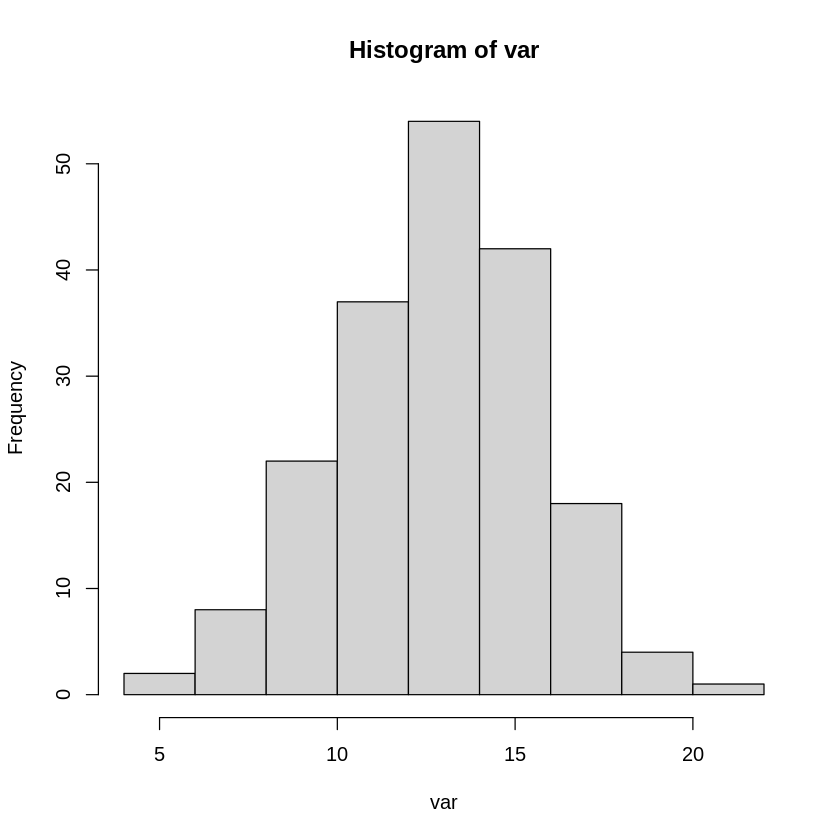

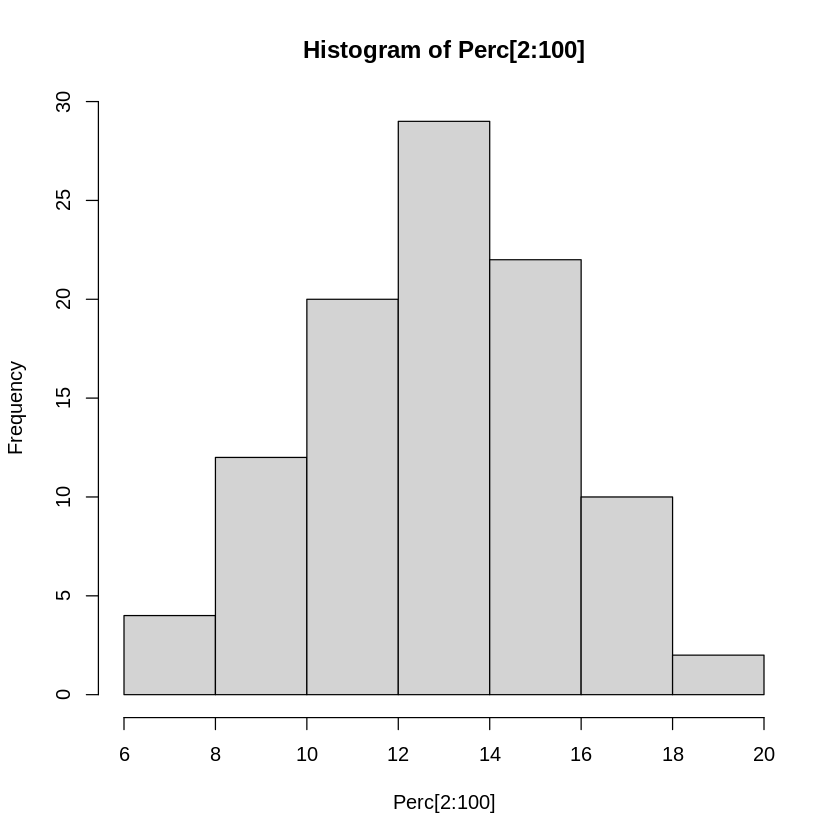

[1] 0.5265957
[1] 0.9946809


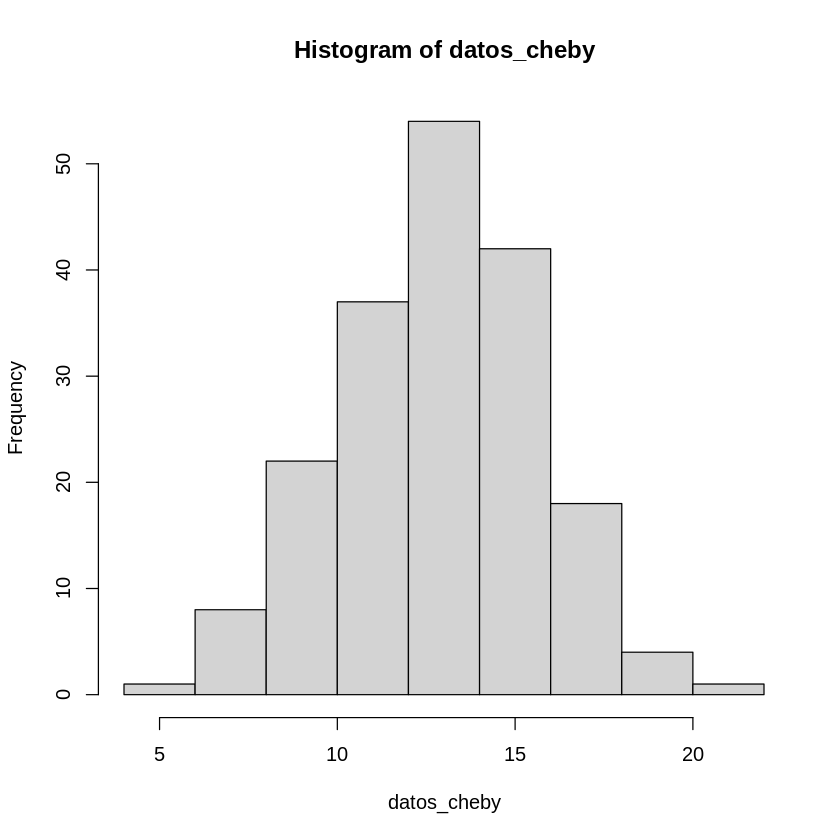

[1] 1
[1] 0.5265957
[1] 0.9946809


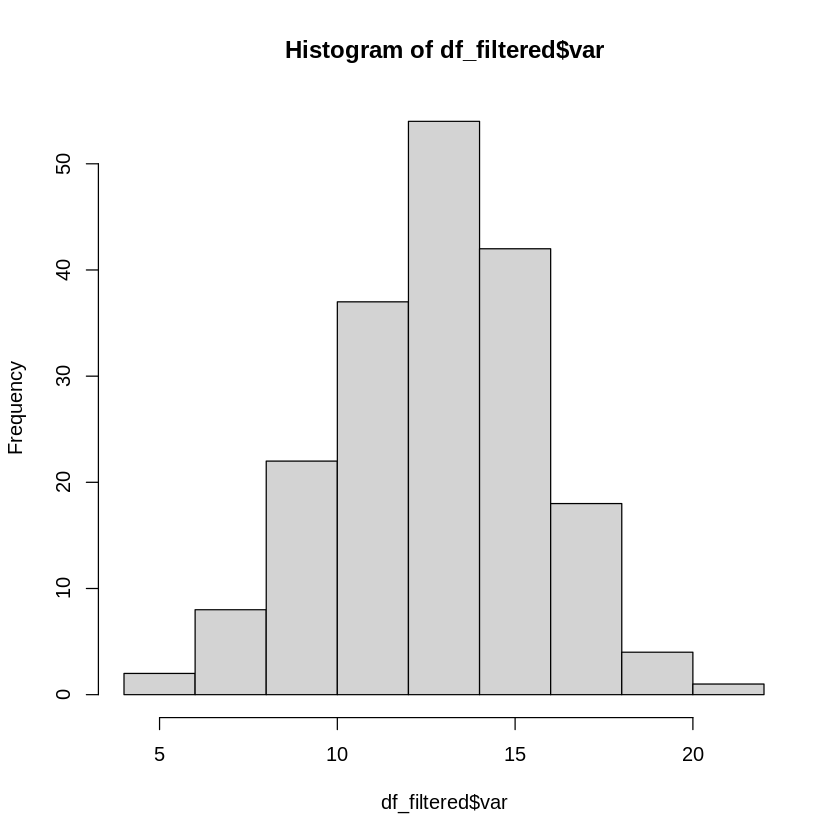

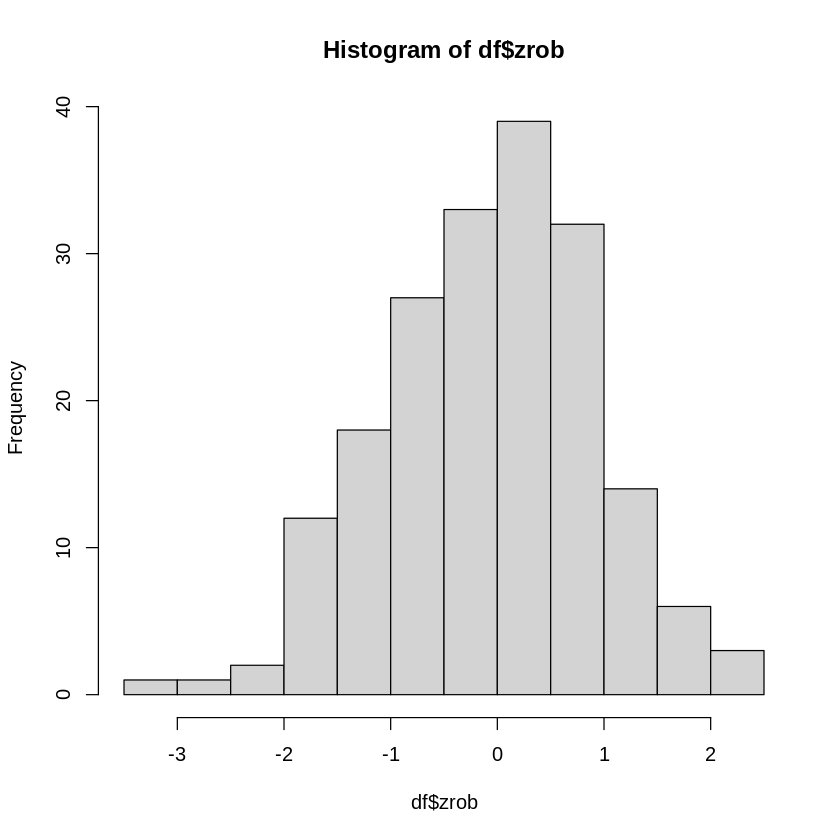

In [71]:
var<-paises$ESCOLARIDAD
hist(var)
# Método 1 - Percentiles
Perc<- quantile(var, prob=seq(0, 1, length = 101))
#P_PIB[100]
#P_PIB[2]
hist(Perc[2:100])
prop_perc<-length(Perc[2:100])/length(var)
#Método 2 - Desigualdad de Chevyshev
  # Define el valor de k
  k <- 3
  # Calcula la media y la desviación estándar
  mean <- mean(var)
  sd <- sd(var)

  # Calcula el número de datos dentro de k desviaciones estándar de la media
  in_range <- sum(abs(var - mean) <= k * sd)

  # Chebyshev's inequality theoretical lower bound
  chebyshev_bound <- 1 - 1 / k^2

datos_cheby<- var[(abs(var - mean) <= k * sd)]
prop_cheby<-length(datos_cheby)/length(var)
hist(datos_cheby)
print(prop_perc)
print(prop_cheby)
#Método 3 - Z Robusto
#define funcion
robust_z <- function(x) {
  median_x <- median(x)
  mad_x <- mad(x)
  z <- (x - median_x) / mad_x
  return(z)
}
# se aplica al dataframe
df<- as.data.frame(data.frame(var))
df$zrob<-  robust_z(var)
df_filtered <- df[abs(df$zrob) <= 5,]
hist(df_filtered$var)
prop_zrob<-length(df_filtered$var)/length(var)
print(prop_zrob)
print(prop_perc)
print(prop_cheby)


hist(df$zrob)